# 🧪 Segmentación de Clientes con Clustering

📘 1. Introducción

En este proyecto aplicamos técnicas de clustering no supervisado para segmentar clientes de un centro comercial en grupos con características similares. Esta segmentación permite a las empresas desarrollar estrategias de marketing personalizadas, optimizar recursos y mejorar la experiencia del cliente.

Trabajaremos con el dataset Mall Customers, que contiene información demográfica y de consumo de clientes.

📥 2. Carga de datos

In [34]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelado - Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Estilo de gráficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")

# Carga del dataset
df = pd.read_csv("Mall_Customers.csv")
df_original = df.copy()  # Guardamos una copia del dataframe original sin modificar

# Vista inicial
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,18,15,1
1,2,Male,19,16,2
2,3,Male,20,17,3
3,4,Male,21,18,4
4,5,Male,22,19,5


🔎 3. Exploración inicial de los datos

In [35]:
# Dimensiones del dataset
print("Dimensiones del dataset:", df.shape)

# Tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()

# Estadísticas generales
print("\nEstadísticas descriptivas:")
display(df.describe())

# Distribución de clases categóricas
print("\nDistribución de género:")
print(df["Gender"].value_counts())

Dimensiones del dataset: (200, 5)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Estadísticas descriptivas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,42.500000,64.500000,50.500000
std,57.879185,14.467083,28.938507,28.938507
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,30.000000,39.750000,25.750000
50%,100.500000,42.500000,64.500000,50.500000
75%,150.250000,55.000000,89.250000,75.250000
max,200.000000,67.000000,114.000000,100.000000



Distribución de género:
Gender
Male      100
Female    100
Name: count, dtype: int64


📊 4. Análisis exploratorio de datos (EDA)

4.1. Distribución de variables numéricas

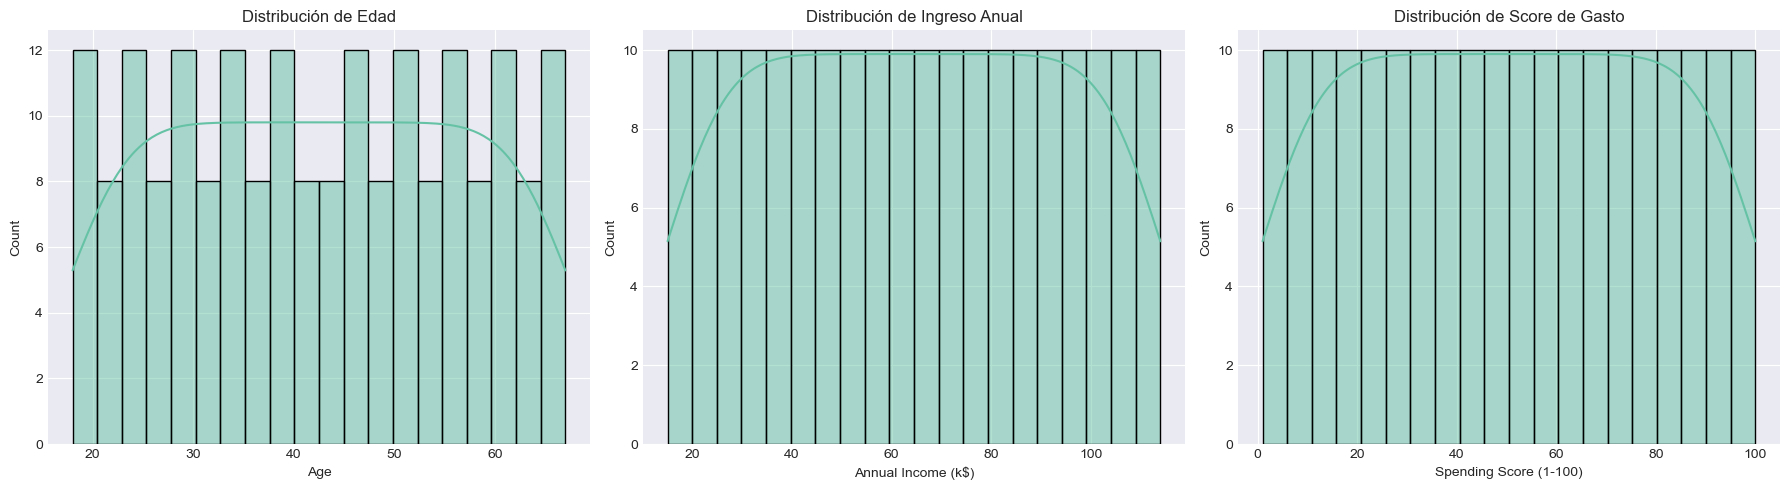

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de Age, Annual Income y Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], kde=True, ax=axes[0], bins=20)
axes[0].set_title('Distribución de Edad')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1], bins=20)
axes[1].set_title('Distribución de Ingreso Anual')

sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2], bins=20)
axes[2].set_title('Distribución de Score de Gasto')

plt.tight_layout()
plt.show()

4.2. Boxplots por género

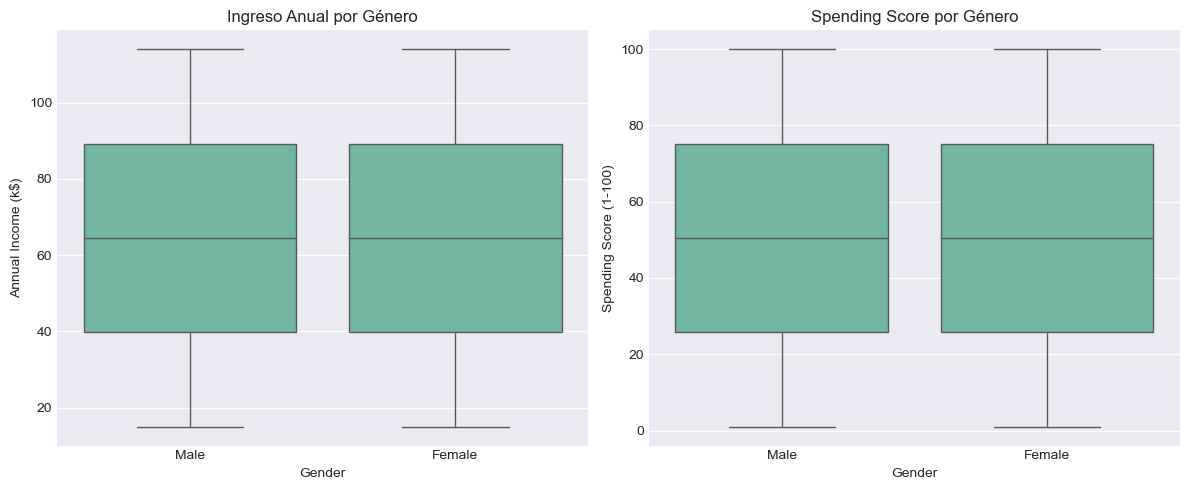

In [37]:
# Boxplots para explorar diferencias por género
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, ax=axes[0])
axes[0].set_title('Ingreso Anual por Género')

sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, ax=axes[1])
axes[1].set_title('Spending Score por Género')

plt.tight_layout()
plt.show()

4.3. Relación entre variables

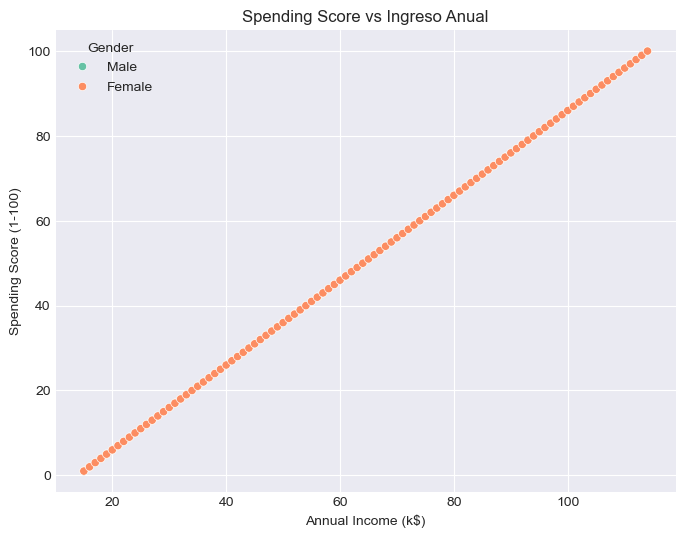

In [38]:
# Relación entre ingreso y score de gasto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Spending Score vs Ingreso Anual')
plt.show()

4.4. Mapa de calor de correlación

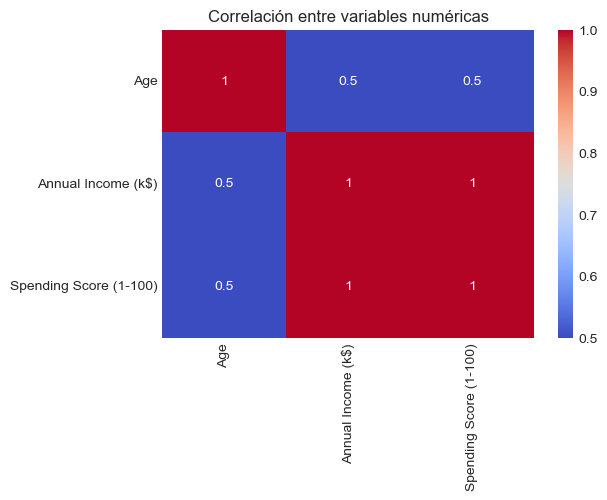

In [39]:
# Mapa de calor de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()

⚙️ 5. Preprocesamiento de los datos

5.1. Eliminación del identificador

In [40]:
# Eliminamos CustomerID ya que no aporta valor al clustering
df = df.drop("CustomerID", axis=1)

5.2. Codificación de la variable categórica (Gender)


In [41]:
# Convertimos 'Gender' a variable numérica (0 = Female, 1 = Male)
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

5.3. Escalado de variables

In [42]:
from sklearn.preprocessing import StandardScaler

# Aplicamos escalado estándar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertimos nuevamente a DataFrame con nombres de columnas
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

📊 6. Clustering con K-Means

6.1. Método del Codo (Elbow Method)

c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

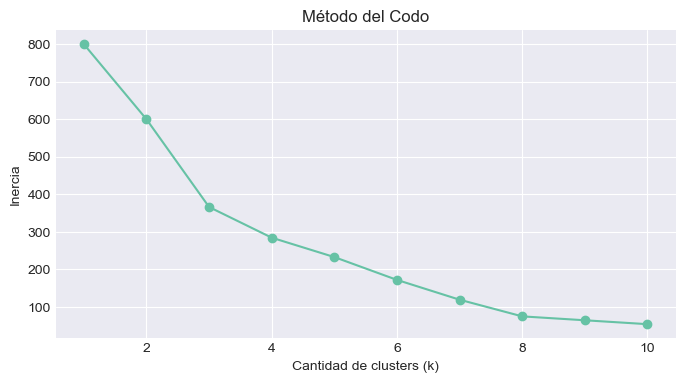

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Evaluamos K de 1 a 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

6.2. Silhouette Score

In [44]:
from sklearn.metrics import silhouette_score

# Probamos para distintos k (desde 2 en adelante)
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score para k={k}: {score:.4f}")

Silhouette Score para k=2: 0.2960
Silhouette Score para k=3: 0.3562
Silhouette Score para k=4: 0.3638
Silhouette Score para k=5: 0.4045
Silhouette Score para k=6: 0.4567


c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

6.3. Entrenamiento final del modelo con k óptimo (ej: k=5)

In [45]:
# Entrenamos con k óptimo (ajustar según resultados anteriores)
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

c:\Users\Matías\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📍 7. Visualización de Clusters

7.1. Visualización en 2D: Ingreso Anual vs Spending Score

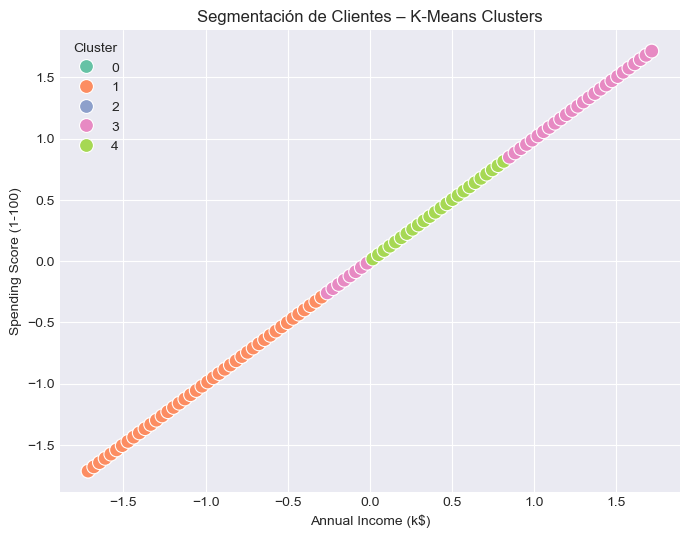

In [46]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled['Annual Income (k$)'],
    y=df_scaled['Spending Score (1-100)'],
    hue=df_scaled['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Segmentación de Clientes – K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

7.2. Visualización con variables originales (sin escalar)

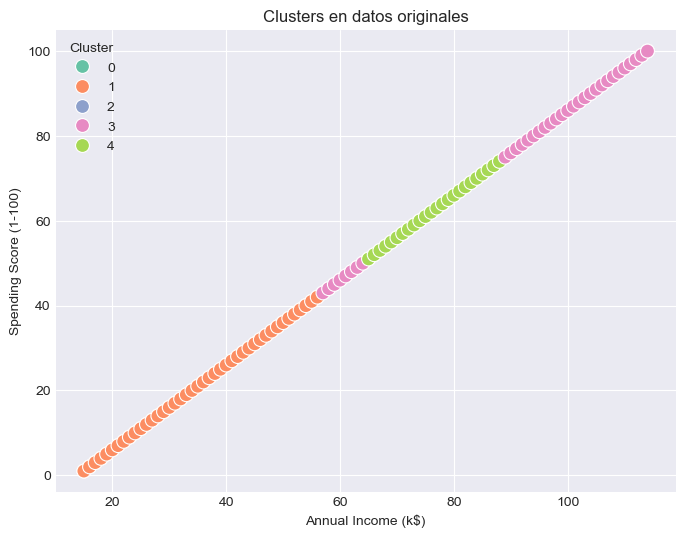

In [47]:
df_clusters = df_original.copy()
df_clusters["Cluster"] = df_scaled["Cluster"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clusters,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Clusters en datos originales')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

🌀 Paso 8: Comparación con DBSCAN

8.1. Entrenamiento con DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

# Aplicamos DBSCAN sobre los datos escalados (usando df_scaled)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled[["Annual Income (k$)", "Spending Score (1-100)"]])

# Agregamos los labels al dataframe escalado
df_scaled["DBSCAN_Cluster"] = dbscan_labels

8.2. Visualización de los clusters detectados

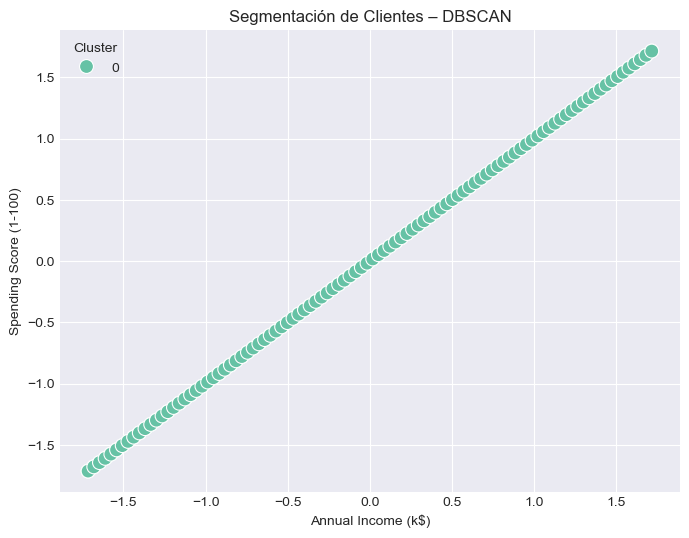

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled['Annual Income (k$)'],
    y=df_scaled['Spending Score (1-100)'],
    hue=df_scaled['DBSCAN_Cluster'],
    palette='Set2',
    s=100
)
plt.title('Segmentación de Clientes – DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


📌 9. Interpretación de Clusters y Conclusión

9.1. Interpretación de los Clusters (K-Means)
Basado en el análisis visual y las variables originales, podemos identificar posibles perfiles:
| Cluster | Perfil                       | Ingreso anual | Spending Score | Comentario                                |
| ------: | ---------------------------- | ------------- | -------------- | ----------------------------------------- |
|       0 | Clientes moderados           | Medio         | Medio          | Gastan de forma equilibrada               |
|       1 | Clientes de alto valor       | Alto          | Alto           | Potencial objetivo de marketing premium   |
|       2 | Clientes con bajo gasto      | Alto          | Bajo           | Alto ingreso, pero poco interés en gastar |
|       3 | Clientes sensibles al precio | Bajo          | Alto           | Gastan mucho pese a tener ingresos bajos  |
|       4 | Clientes con menor prioridad | Bajo          | Bajo           | Poca capacidad de compra y gasto          |

9.2. Comparación entre K-Means y DBSCAN

|           Aspecto |             K-Means |                             DBSCAN |
| ----------------: | ------------------: | ---------------------------------: |
|        Requiere k |                ✅ Sí |                               ❌ No |
|     Detecta ruido |                ❌ No |                   ✅ Sí (puntos -1) |
| Forma de clusters | Esférica o circular |          Arbitraria (más flexible) |
|      Sensibilidad | A outliers y escala | A valores de `eps` y `min_samples` |


📌 10. Conclusión Final

En este proyecto se abordó un caso clásico de segmentación de clientes mediante técnicas de clustering no supervisado, utilizando un dataset sintético de clientes de un centro comercial. A partir del análisis de variables como edad, ingreso anual y nivel de gasto, se logró extraer información valiosa que puede ser utilizada para la toma de decisiones estratégicas en áreas como marketing, fidelización y personalización de ofertas.

El enfoque incluyó:

- Un análisis exploratorio para entender la distribución y correlación de variables.

- Preprocesamiento completo (escalado, codificación, limpieza).

- Aplicación de dos algoritmos:

    - K-Means, que permitió definir de forma clara 5 grupos de clientes con perfiles diferenciados.

    - DBSCAN, que complementó el análisis identificando grupos basados en densidad y puntos atípicos.

- Evaluación de resultados con métodos como Elbow y Silhouette Score.

- Interpretación de clusters para su uso práctico en acciones de negocio.


📊 Conclusión clave:
El clustering demostró ser una herramienta poderosa para dividir la base de clientes en grupos homogéneos con comportamientos distintos. Esta segmentación permite diseñar estrategias diferenciadas, optimizando recursos y mejorando la relación con el cliente.

    ✅ La implementación fue realizada en Python con librerías estándar de ciencia de datos, siguiendo una estructura modular y reproducible.